# 1. Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
# Rename the columns
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)

Drop unnecessary columns from the dataset.

In [6]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [7]:
data['CNEN'].value_counts()

CNEN
Khlong Saen Saep                               33
Khlong Prem Prachakorn                         24
Khlong Chong Nonsi                             18
Khlong Phlapphla                               18
Khlong Rob Krung                               18
                                               ..
Khlong Bang Luang                               1
Khlong Phraya Suren                             1
Khlong Phra Rajadamri 1 (Khlong Bueng Phai)     1
Khlong Tanod                                    1
Orachon Canal                                   1
Name: count, Length: 168, dtype: int64

**Data Preprocessing**

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CID,917.0,7.297593e+02,5.539785e+02,12.0,2.210000e+02,5.910000e+02,1.191000e+03,1.822000e+03
Year,917.0,2.562009e+03,8.200079e-01,2561.0,2.561000e+03,2.562000e+03,2.563000e+03,2.563000e+03
Temp,917.0,2.869433e+01,1.845115e+00,0.0,2.850000e+01,2.900000e+01,2.930000e+01,3.190000e+01
pH,917.0,7.242007e+00,4.628296e-01,0.0,7.130000e+00,7.290000e+00,7.400000e+00,9.100000e+00
DO,917.0,1.667045e+00,1.282984e+00,0.0,5.100000e-01,1.600000e+00,2.600000e+00,9.700000e+00
HS,917.0,1.798037e-01,3.896647e-01,0.0,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e+00
BO,917.0,1.280267e+01,9.397183e+00,0.0,6.250000e+00,9.800000e+00,1.583000e+01,8.450000e+01
CO,917.0,6.410376e+01,2.235050e+01,0.0,5.100000e+01,6.050000e+01,7.210000e+01,2.020000e+02
SS,917.0,2.195372e+01,1.719485e+01,0.0,1.200000e+01,1.700000e+01,2.600000e+01,1.483000e+02
TKN,917.0,7.999945e+00,5.133194e+00,0.0,4.100000e+00,7.100000e+00,1.080000e+01,3.980000e+01


Check for column types.

In [9]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

In [10]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

Check for null values in the dataset.

In [11]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [12]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [13]:
# Skewness and Kurtosis of numerical columns
print("Skewness:\n", data.select_dtypes(include='number').skew())

Skewness:
 CID       0.465911
Year     -0.016114
Temp    -12.500872
pH      -12.456230
DO        0.672971
HS        5.532990
BO        2.243097
CO        2.282213
SS        3.015937
TKN       1.404893
AN        1.444743
NO2N      0.935423
NO3N      2.221041
TP        0.721560
TC             NaN
WSPEN    -0.004069
CNEN     -0.010430
dtype: float64


In [14]:
print("\nKurtosis:\n", data.select_dtypes(include='number').kurtosis())


Kurtosis:
 CID       -1.116403
Year      -1.512721
Temp     190.207743
pH       195.164468
DO         1.272318
HS        48.930997
BO         7.508975
CO         9.833919
SS        13.187015
TKN        3.640077
AN         2.644681
NO2N       0.777716
NO3N      15.322368
TP         0.871746
TC              NaN
WSPEN     -1.254632
CNEN      -1.062828
dtype: float64


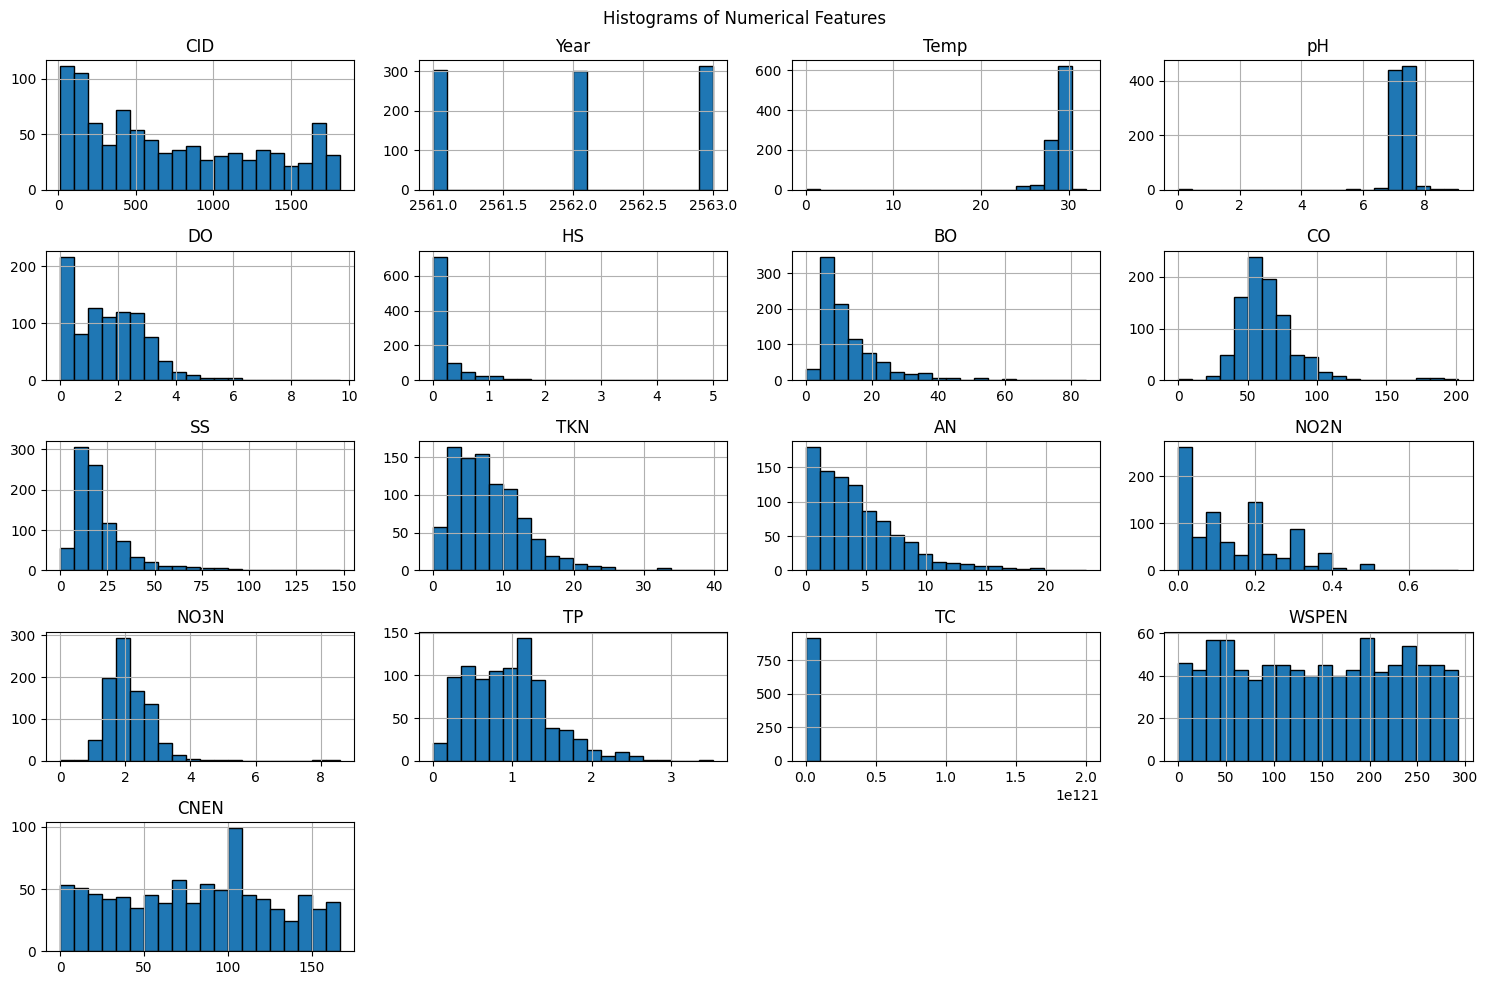

In [15]:
# Visualize distribution of numerical features
data.select_dtypes(include='number').hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

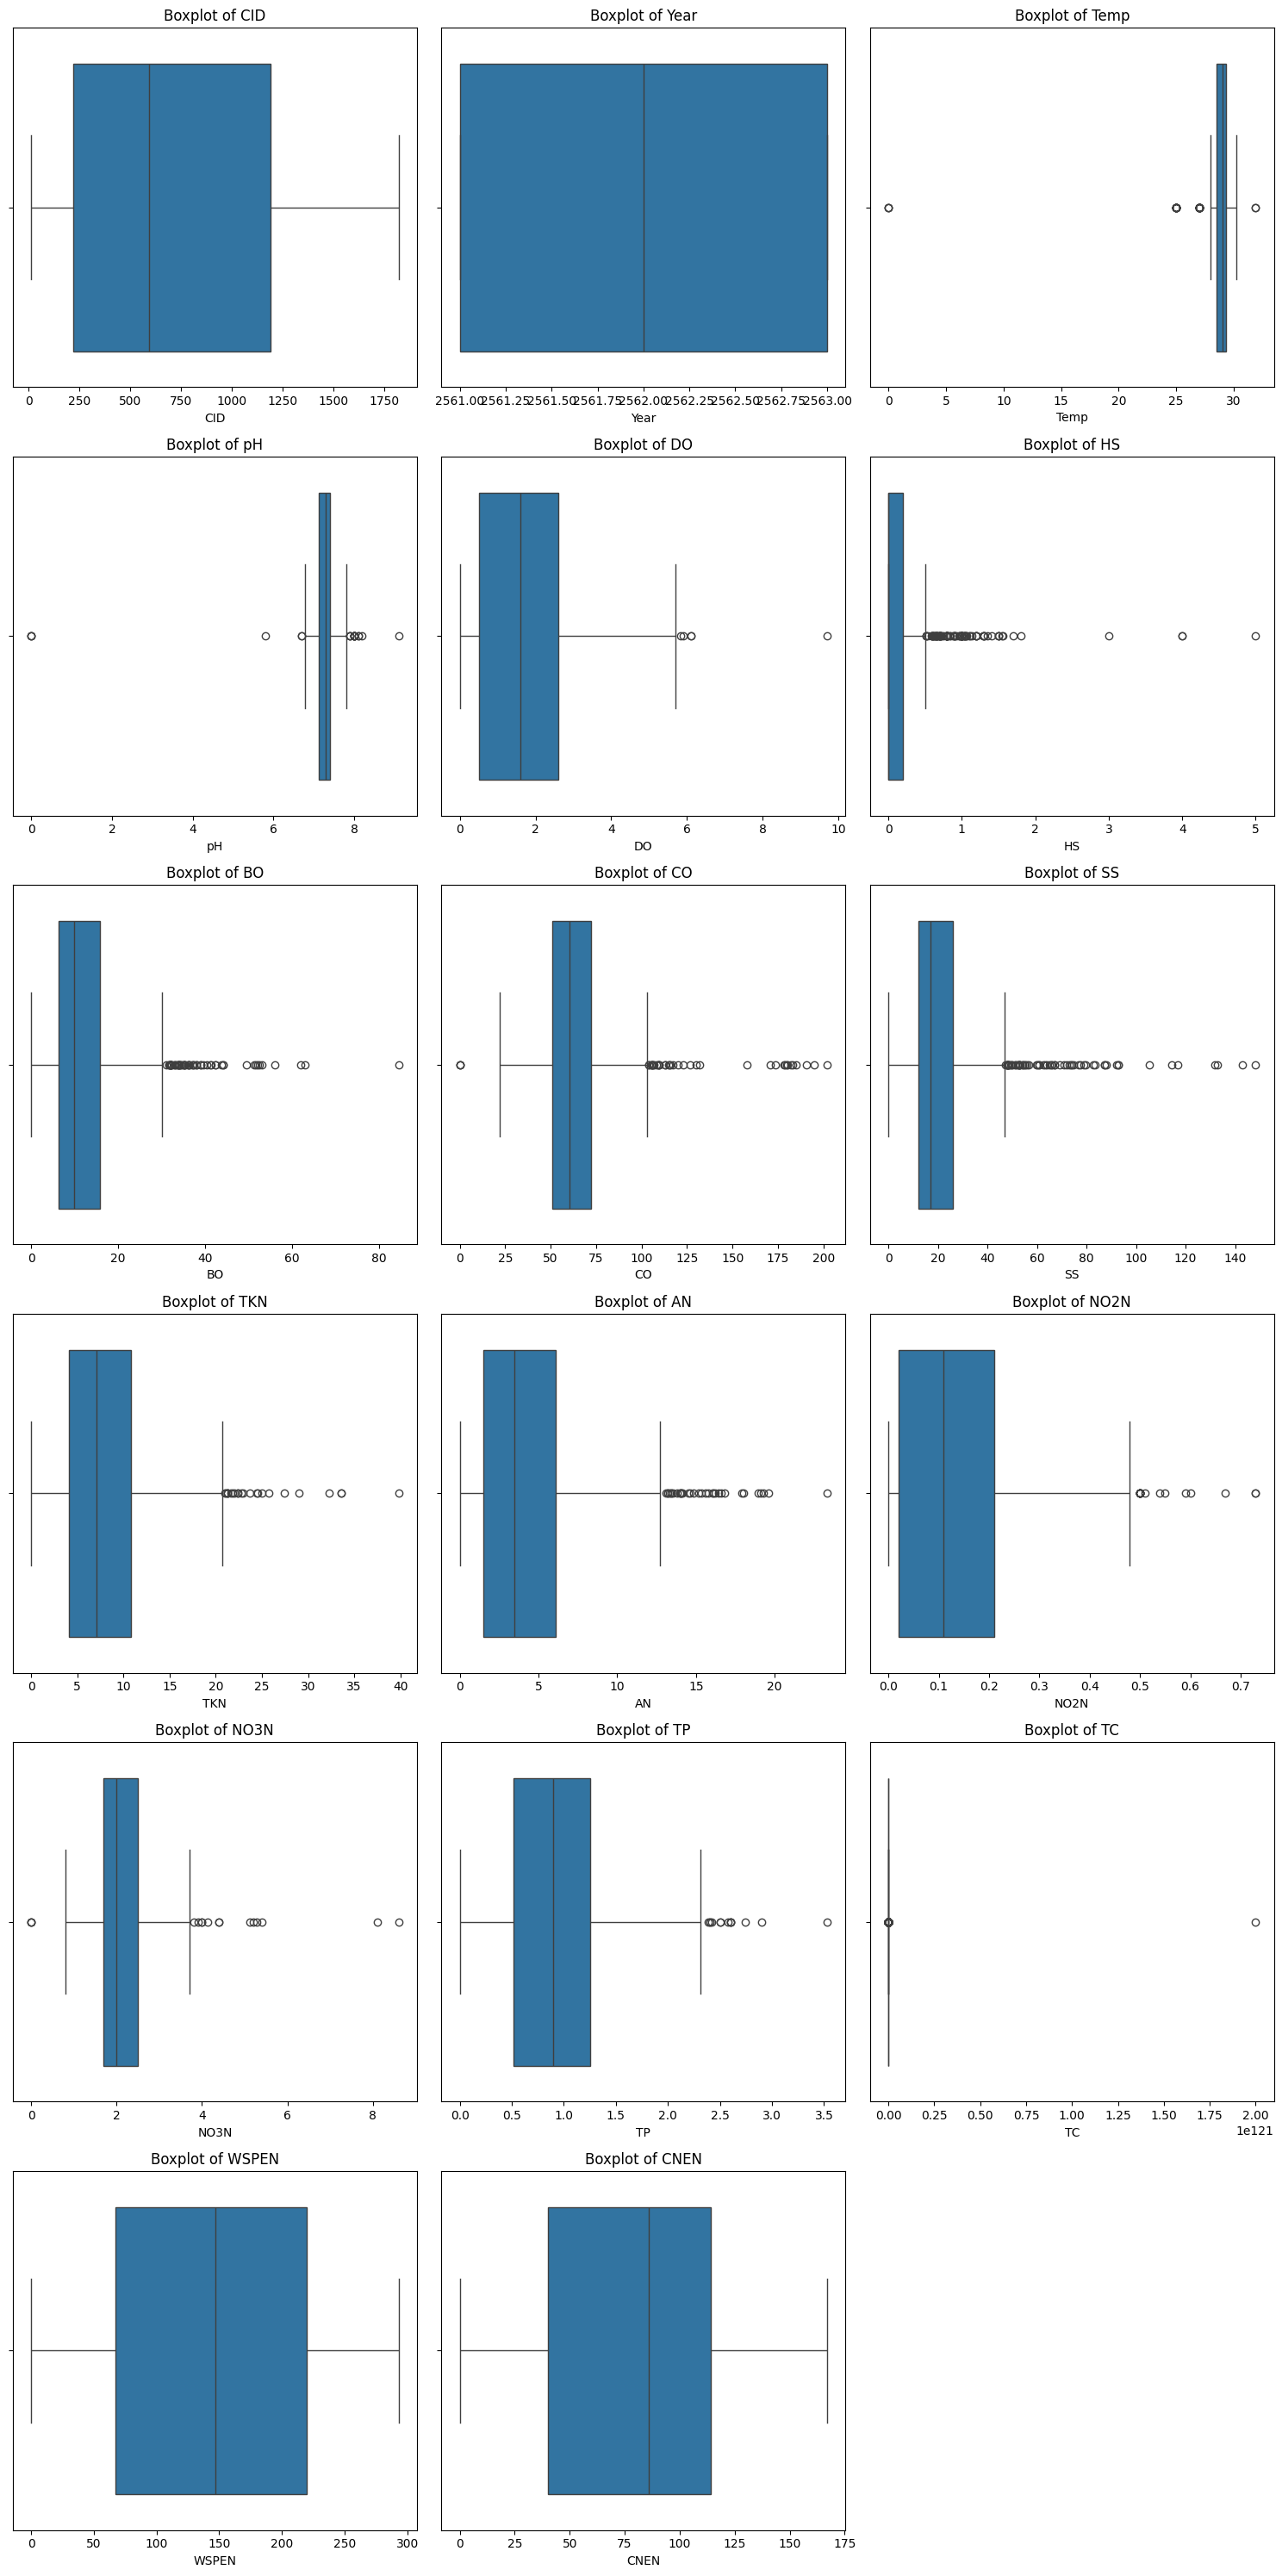

In [16]:
# Create boxplots to detect outliers
import math
numeric_cols = data.select_dtypes(include='number').columns
rows = math.ceil(len(numeric_cols)/3)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

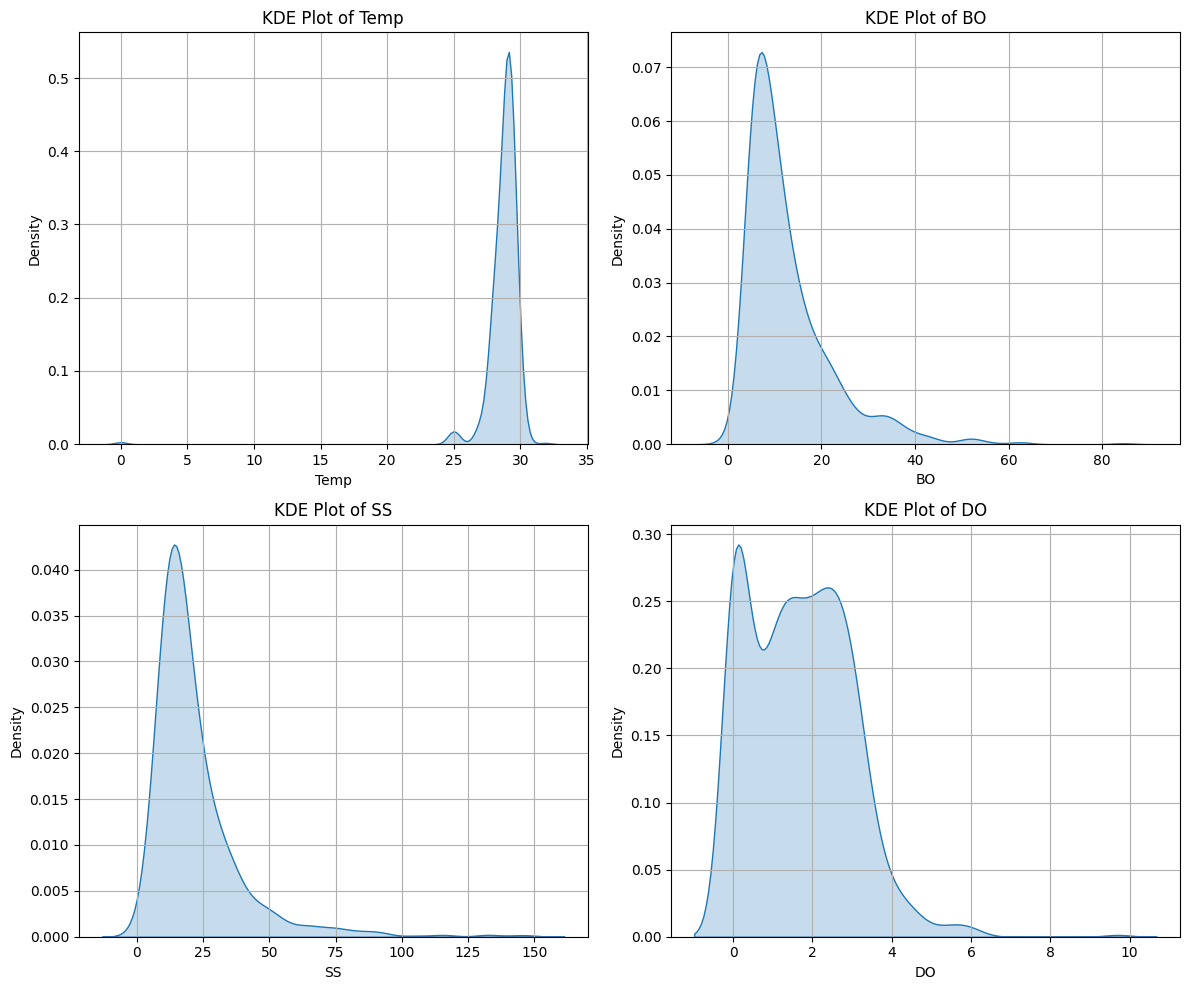

In [17]:
features = ['Temp', 'BO', 'SS', 'DO']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(data[col], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import zscore

z_scores = np.abs(zscore(data.select_dtypes(include='number')))
outlier_mask = (z_scores > 3)
outliers = (outlier_mask.sum(axis=1) > 0)
print("Outlier Rows:", outliers.sum())


Outlier Rows: 88


In [19]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [20]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [21]:
data['TC_log'] = np.log10(data['TC'] + 1)
data['TC_log'].describe()

count    917.000000
mean      10.508681
std        5.765990
min        0.000000
25%        8.086360
50%       10.184691
75%       12.322219
max      121.301030
Name: TC_log, dtype: float64

In [22]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'TC_log'],
      dtype='object')

**Feature Engineering**

#### Sum the Sub-Indices to Calculate WQI

The total Water Quality Index (WQI) is computed by summing the weighted sub-indices for all parameters and normalizing by the sum of the weights. This step aggregates the individual contributions of each parameter into a single numerical value that reflects the overall water quality. The formula for WQI is given by:

$$ \text{WQI} = \frac{\sum_{i=1}^{N} q_i \times w_i}{\sum_{i=1}^{N} w_i} $$

Where:
- \( N \): The total number of parameters (features) used in the WQI calculation.
- \( q_i \): The normalized value (sub-index) of the \( i \)-th parameter, scaled from 0 to 100, where higher values indicate better water quality.
- \( w_i \): The weight assigned to the \( i \)-th parameter, reflecting its relative importance to overall water quality.

In this method, the weights are chosen such that their sum equals 1, simplifying the formula to:

$$ \text{WQI} = \sum_{i=1}^{N} q_i \times w_i $$

This final WQI value is then interpreted using predefined classification ranges (e.g., Safe, Petentially Unsafe, Unsafe) to assess the water quality of the sample.

In [23]:
# Apply log transformation to TC
data['TC_log'] = np.log10(data['TC'] + 1)

# Define normalization functions
def normalize_ph(ph):
    if 5 <= ph < 7:
        return 100 * (ph - 5) / (7 - 5)
    elif 7 <= ph <= 9.5:
        return 100 * (9.5 - ph) / (9.5 - 7)
    else:
        return 0

def normalize_do(do):
    return min(100, max(0, 100 * (do - 2) / (5 - 2)))


def normalize_tc_log(tc_log):
    return min(100, max(0, 100 * (5 - tc_log) / (5 - 3)))

def normalize_no3n(no3n):
    return min(100, max(0, 100 * (50 - no3n) / (50 - 10)))

def normalize_no2n(no2n):
    return min(100, max(0, 100 * (1 - no2n) / (1 - 0.05)))

def normalize_nh3n(nh3n):
    return min(100, max(0, 100 * (1.5 - nh3n) / (1.5 - 0.5)))

def normalize_tp(tp):
    return min(100, max(0, 100 * (1 - tp) / (1 - 0.1)))

def normalize_ss(ss):
    return min(100, max(0, 100 * (500 - ss) / (500 - 50)))

def normalize_bod(bod):
    return min(100, max(0, 100 * (10 - bod) / (10 - 2)))

def normalize_tkn(tkn):
    return min(100, max(0, 100 * (2 - tkn) / (2 - 0.5)))

# Based on typical standards: HS ≤ 0.05 mg/L is acceptable, ≥ 0.5 mg/L is unacceptable
def normalize_hs(hs):
    return min(100, max(0, 100 * (0.5 - hs) / (0.5 - 0.05)))

def normalize_cod(cod):
    return min(100, max(0, 100 * (100 - cod) / (100 - 20)))

#  normalization to compute q_i for WQI calculation
data['Qi_pH'] = data['pH'].apply(normalize_ph)
data['Qi_DO'] = data['DO'].apply(normalize_do)
data['Qi_BO'] = data['BO'].apply(normalize_bod)
data['Qi_TC_log'] = data['TC_log'].apply(normalize_tc_log)
data['Qi_NO3N'] = data['NO3N'].apply(normalize_no3n)
data['Qi_NO2N'] = data['NO2N'].apply(normalize_no2n)
data['Qi_AN'] = data['AN'].apply(normalize_nh3n)
data['Qi_TP'] = data['TP'].apply(normalize_tp)
data['Qi_SS'] = data['SS'].apply(normalize_ss)
data['Qi_TKN'] = data['TKN'].apply(normalize_tkn)
data['Qi_HS'] = data['HS'].apply(normalize_hs)
data['Qi_CO'] = data['CO'].apply(normalize_cod)

weights = {
    'Qi_pH': 0.083,
    'Qi_DO': 0.083,
    'Qi_BO': 0.083,
    'Qi_TC_log': 0.083,
    'Qi_NO3N': 0.104,
    'Qi_NO2N': 0.104,
    'Qi_AN': 0.083,
    'Qi_TP': 0.083,
    'Qi_SS': 0.063,
    'Qi_TKN': 0.083,
    'Qi_HS': 0.063,
    'Qi_CO': 0.083
}

# sum of weights
sum_weights = sum(weights.values())
print(f"Sum of weights: {sum_weights:.4f}")

#  sub-indices (q_i * w_i)
for qi_col, weight in weights.items():
    data[f'Weighted_{qi_col}'] = data[qi_col] * weight

# Calculate WQI
weighted_cols = [f'Weighted_{col}' for col in weights.keys()]
data['WQI'] = data[weighted_cols].sum(axis=1)


# Interpret
def interpret_wqi(wqi):
    if 70 <= wqi <= 100:
        return 'Safe (2)'
    elif 50 <= wqi < 70:
        return 'Potentially Unsafe (1)'
    else:
        return 'Unsafe (0)'


data['WQI_Status'] = data['WQI'].apply(interpret_wqi)

Sum of weights: 0.9980


In [24]:
data['WQI'].describe()

count    917.000000
mean      48.545830
std        9.952957
min       33.093895
25%       40.941507
50%       46.145714
75%       54.971032
max       83.200000
Name: WQI, dtype: float64

In [25]:
data['WQI_Status'].value_counts()

WQI_Status
Unsafe (0)                578
Potentially Unsafe (1)    317
Safe (2)                   22
Name: count, dtype: int64

In [26]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,...,Weighted_Qi_NO3N,Weighted_Qi_NO2N,Weighted_Qi_AN,Weighted_Qi_TP,Weighted_Qi_SS,Weighted_Qi_TKN,Weighted_Qi_HS,Weighted_Qi_CO,WQI,WQI_Status
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,...,10.4,10.400000,4.98,8.300000,6.3,0.00,6.3,6.01750,64.801667,Potentially Unsafe (1)
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,...,10.4,10.400000,7.47,8.300000,6.3,1.66,6.3,4.87625,66.648417,Potentially Unsafe (1)
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,...,10.4,7.225263,7.47,7.377778,6.3,0.00,6.3,4.56500,59.805541,Potentially Unsafe (1)
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,...,10.4,10.400000,7.47,8.300000,6.3,0.00,6.3,5.49875,71.142303,Safe (2)
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,...,10.4,9.414737,7.47,6.455556,6.3,0.00,6.3,6.64000,64.434292,Potentially Unsafe (1)


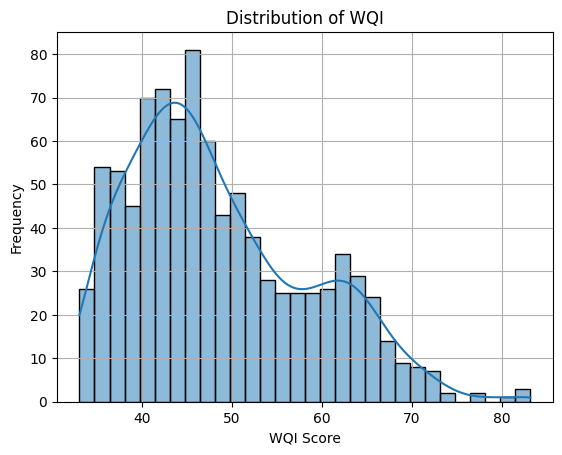

In [27]:
sns.histplot(data['WQI'], bins=30, kde=True)
plt.title("Distribution of WQI")
plt.xlabel("WQI Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [28]:
corr_data = data[ ['pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC','WQI'] ]
correlations = corr_data.corr(numeric_only=True)['WQI'].sort_values(ascending=False)
print("Top correlated features with WQI:\n", correlations)

Top correlated features with WQI:
 WQI     1.000000
DO      0.558753
SS      0.148525
NO2N    0.052447
TC     -0.045429
NO3N   -0.124664
pH     -0.137043
CO     -0.480235
HS     -0.507664
BO     -0.711827
AN     -0.722666
TKN    -0.759909
TP     -0.802117
Name: WQI, dtype: float64


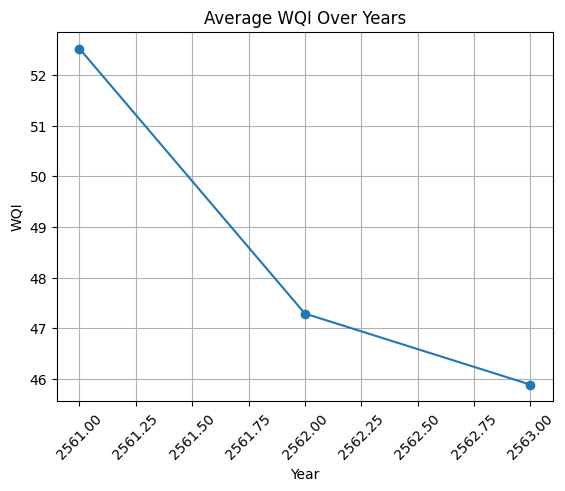

In [29]:
# Trend over year (if multiple years exist)
data.groupby('Year')['WQI'].mean().plot(marker='o')
plt.title("Average WQI Over Years")
plt.xlabel("Year")
plt.ylabel("WQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


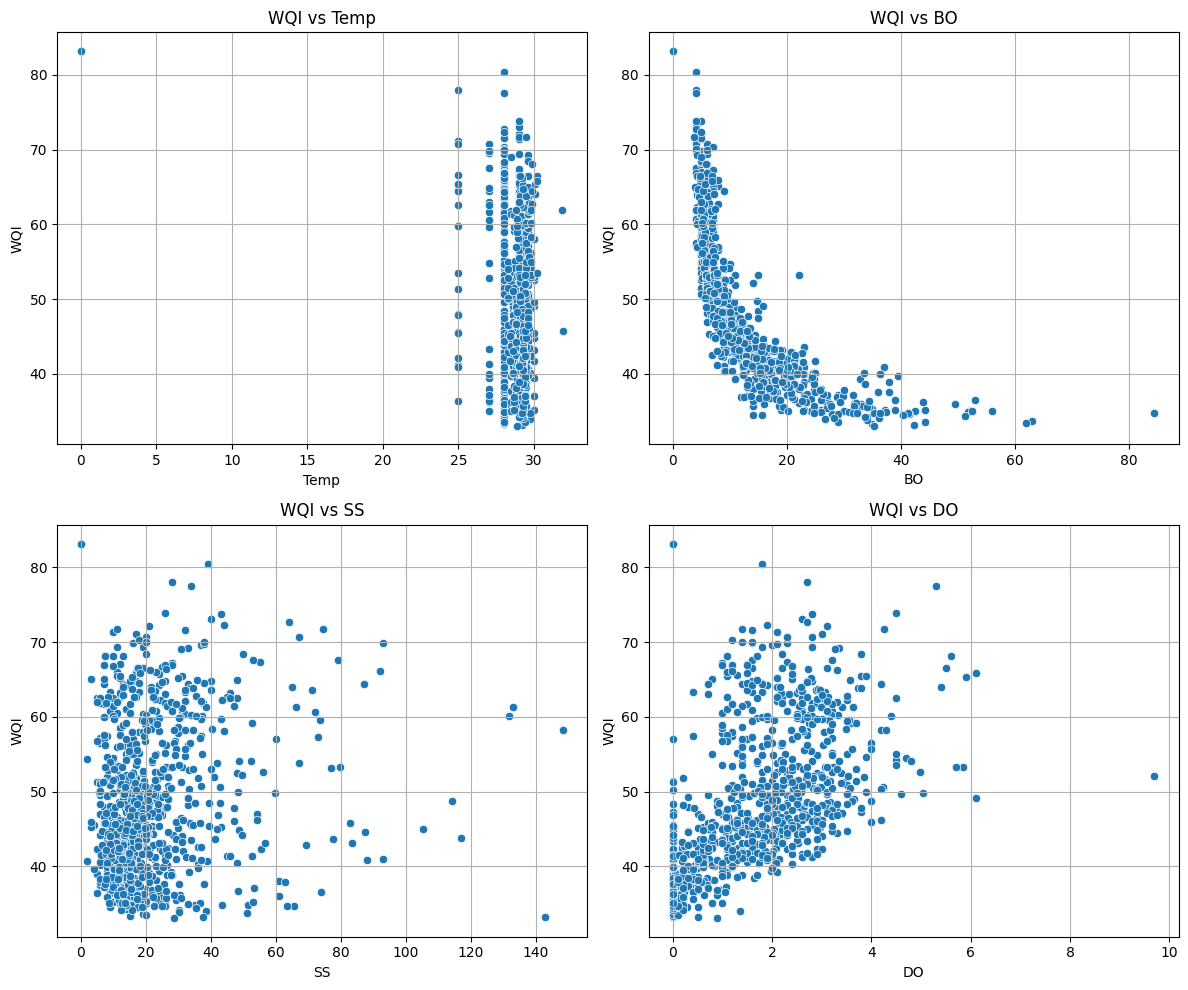

In [30]:
# Select top 4 key features to visualize against WQI
features = ['Temp', 'BO', 'SS', 'DO']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y='WQI', ax=axes[i])
    axes[i].set_title(f"WQI vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("WQI")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

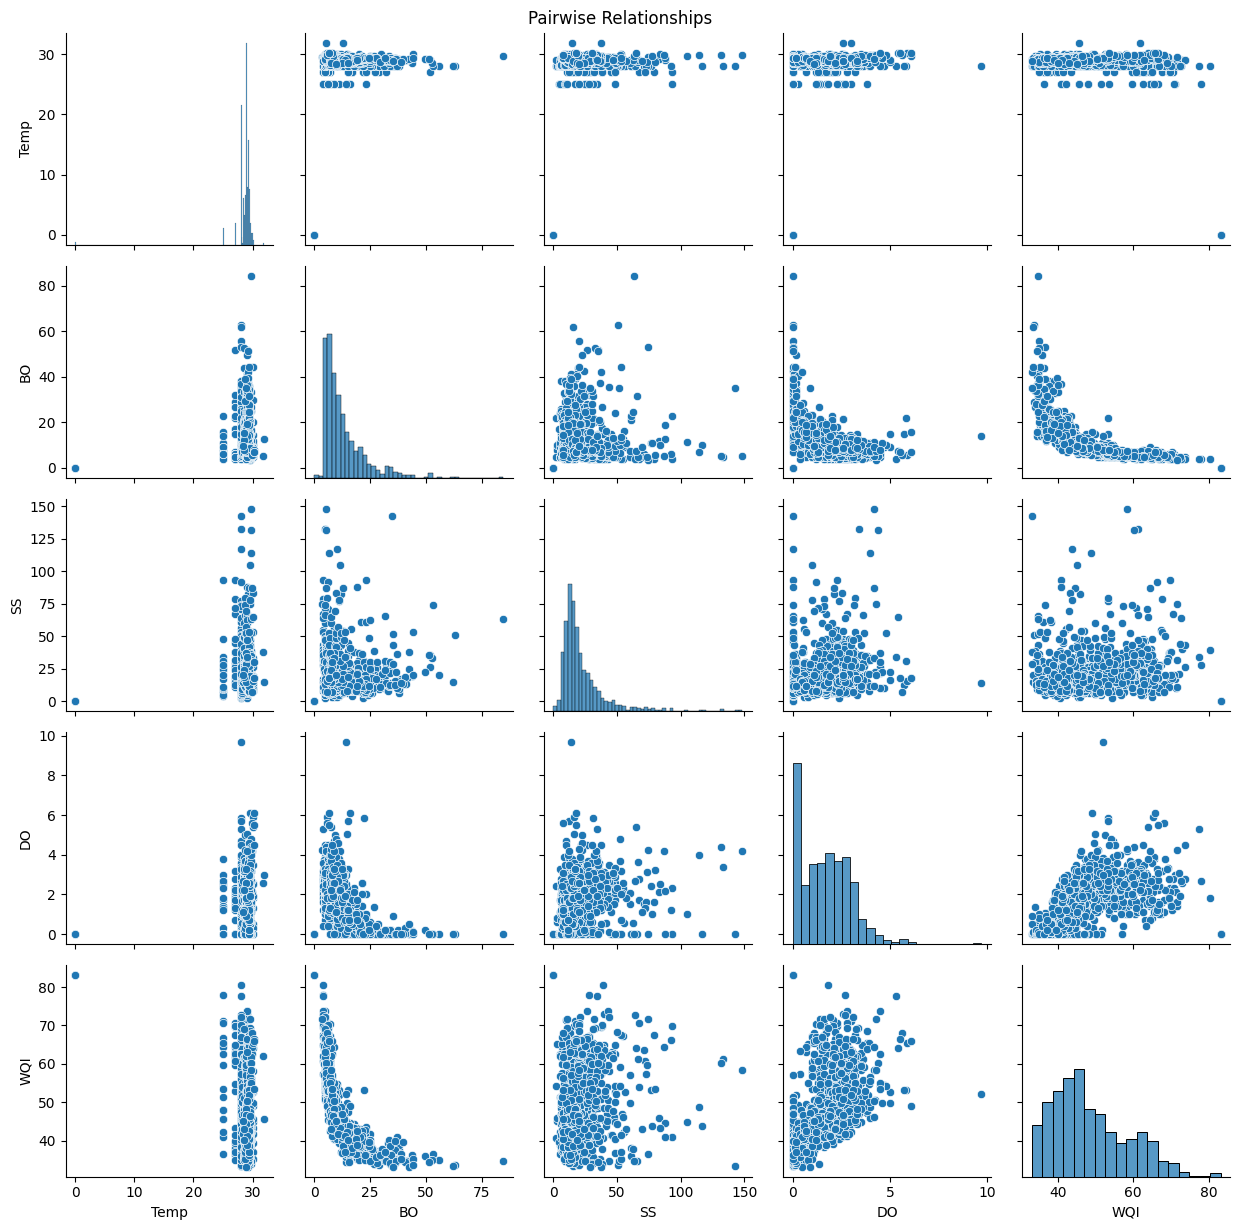

In [31]:
#pairplot
sns.pairplot(data[['Temp', 'BO', 'SS', 'DO', 'WQI']])
plt.suptitle("Pairwise Relationships")
plt.tight_layout()
plt.show()


<Axes: >

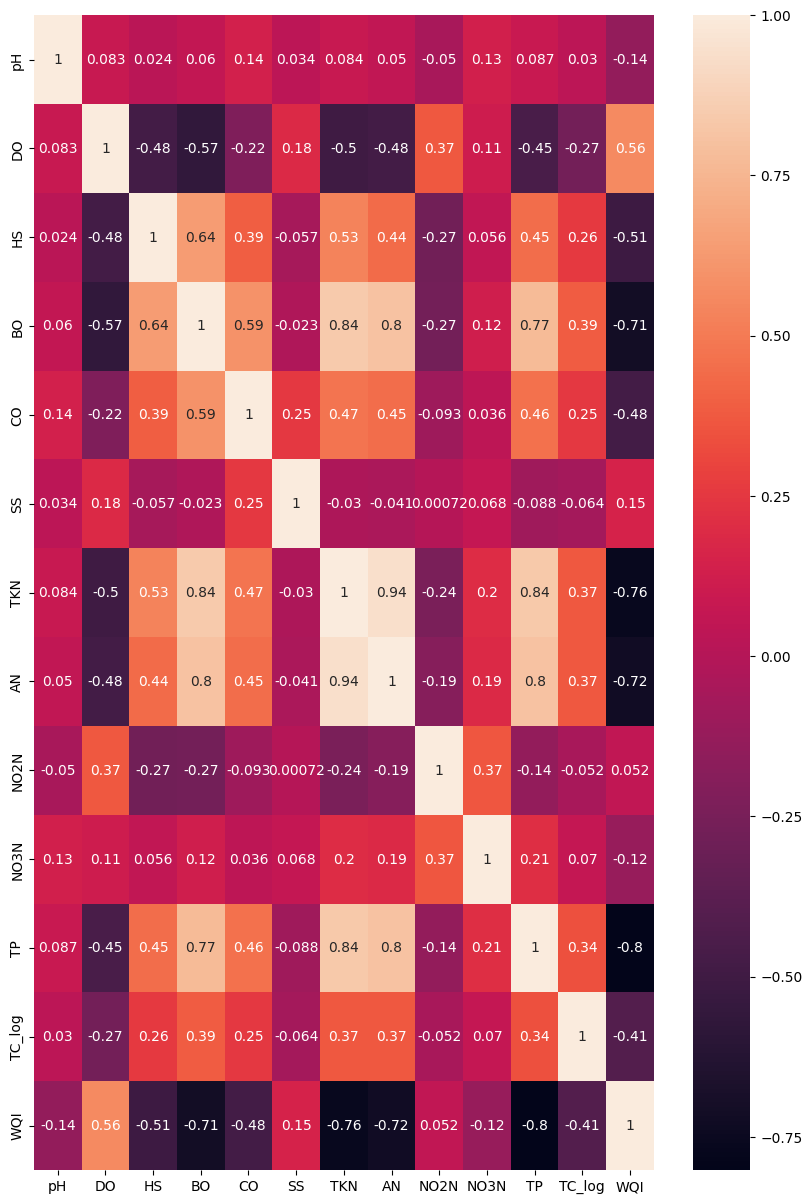

In [32]:
plt.figure(figsize=(10, 15))
corr_data = data[ ['pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC_log', 'WQI'] ]
sns.heatmap(corr_data.corr(), annot=True)

In [33]:
X = data[ ['pH', 'DO', 'BO', 'NO3N', 'SS', 'CO', 'TC_log'] ]
y = np.log1p(data['WQI'])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [35]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
import joblib
joblib.dump(scaler, "scaler.dump")

['scaler.dump']

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


algorithms = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [38]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in algorithms.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_median_absolute_error')

    print(f"{name} - Score: {cv_scores}; Mean: {cv_scores.mean()}")

Linear Regression - Score: [-0.07254647 -0.07791201 -0.07717473 -0.06692277 -0.07531485]; Mean: -0.07397416730316757
SVR - Score: [-0.04999806 -0.05421272 -0.05044428 -0.05339308 -0.05069818]; Mean: -0.05174926762987701
Random Forest - Score: [-0.03992185 -0.03622719 -0.04140447 -0.03268963 -0.03594436]; Mean: -0.037237500013758675
Gradient Boosting - Score: [-0.03867418 -0.03813795 -0.03624665 -0.03455085 -0.03441983]; Mean: -0.03640589194808763


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', 0.5]
}

scoring = {
    "neg_mean_squared_error": make_scorer(mean_squared_error, greater_is_better=False),
    "neg_mean_absolute_error": make_scorer(mean_absolute_error, greater_is_better=False),
    "neg_median_absolute_error": make_scorer(median_absolute_error, greater_is_better=False),
    "r2": make_scorer(r2_score),
}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=0,
                           refit='neg_median_absolute_error',
                           scoring=scoring
                        )

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}


In [40]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=4, max_features='sqrt', n_estimators=200,
                          random_state=42)

In [41]:
import joblib

model_name = 'wpp_model_weight.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

['wpp_model_weight.pkl']

In [42]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred = np.exp(loaded_model.predict(X_test))

In [43]:
y_test_orig = np.exp(y_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error

print("Mean Squared Error      :", mean_squared_error(y_test_orig, y_pred))
print("Mean Absolute Error     :", mean_absolute_error(y_test_orig, y_pred))
print("Median Absolute Error   :", median_absolute_error(y_test_orig, y_pred))
print("R2 Score                :", r2_score(y_test_orig, y_pred))

Mean Squared Error      : 9.648018281696068
Mean Absolute Error     : 2.2161894102333295
Median Absolute Error   : 1.3998175567142717
R2 Score                : 0.902467662419821


In [45]:
df_comparison = pd.DataFrame({
    'Actual_ISQA': y_test_orig,
    'Predicted_ISQA': y_pred
})

df_comparison['Error'] = df_comparison['Actual_ISQA'] - df_comparison['Predicted_ISQA']
df_comparison['Error'].head()
# df_comparison.sort_values(by='Error', ascending=False)

668    0.631133
30    -0.952002
377   -3.421712
535   -1.620470
806    2.974557
Name: Error, dtype: float64

In [46]:
df_comparison['Error'].describe()

count    138.000000
mean      -0.370615
std        3.095171
min      -11.440710
25%       -1.854593
50%       -0.275591
75%        1.044859
max        9.824120
Name: Error, dtype: float64

Lets plot the distribution of the error.

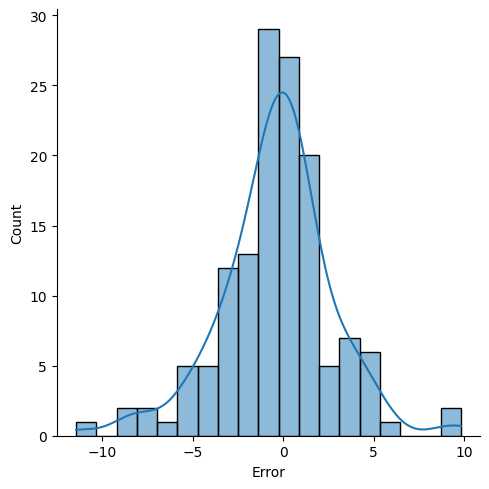

In [47]:
sns.displot(df_comparison['Error'], kde=True)

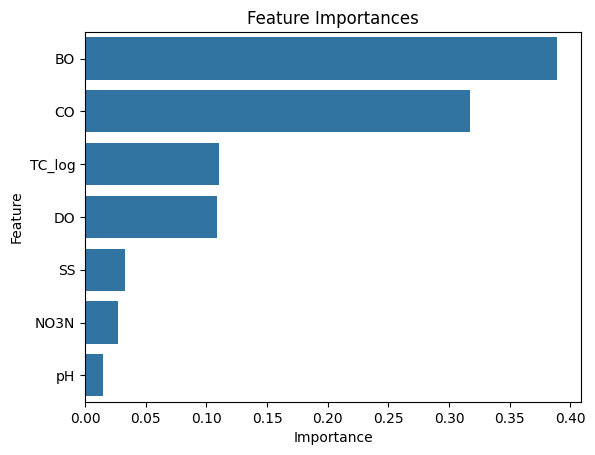

In [48]:
feature_importances = loaded_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the sorted feature importances
# plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()